In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [2]:
#Conversions and assumptions
biogas_methane = 0.60
biogas_co2 = 0.4
TCF = 1
MMBtu = 1.037
days = 365
hours = days * 24

#Swine Waste to Methane Cost Data
dfWasteToCost = pd.DataFrame({"Farm_type":"Swine",
                              "Digester":"Covered Lagoon",
                              "Biogas":[634,1226,6436],
                              "Methane":[23.7,13.7,5.2]
                             })

#Cost curve
x = np.log(dfWasteToCost.Biogas)
y = dfWasteToCost.Methane
slope,yint = np.polyfit(x,y,1)
fx = np.poly1d((slope,yint))
print("Slope = {0:.2f}; y-intercept = {1:.2f}".format(slope,yint))
fx_txt = "y = {0:.2f}ln(x) + {1:.2f}".format(slope,yint)

Slope = -7.43; y-intercept = 69.51


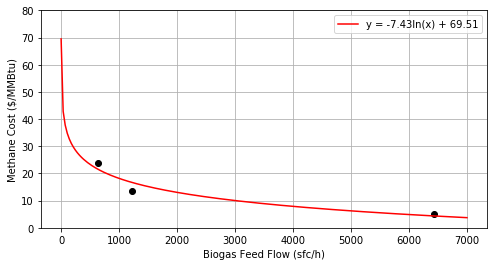

In [3]:
xp = np.log(np.linspace(1,7000,200))
plt.figure(figsize=(8,4))
plt.plot(np.exp(x), y, 'ko', label="")
plt.plot(np.exp(xp), fx(xp), 'r-', label=fx_txt)
plt.legend()
plt.ylim(0,80)
plt.xlabel("Biogas Feed Flow (sfc/h)")
plt.ylabel("Methane Cost ($/MMBtu)")
plt.grid()
plt.show()

In [6]:
#Read in the data
dfDuplin = pd.read_excel('../data/DuplinCountySwineFarmEconomics.xlsx',sheet_name='Duplin County Swine Farm Master')
#Sort on Total Potential Methane Yield (MMBtu/y) - high to low
dfDuplin.sort_values('Total Potential Methane Yield (MMBtu/y)',ascending=False,inplace=True)
#Compute cumulative sum of Total Potential Methane Yield (MMBtu/y)
dfDuplin['Cumulative Potential Methane Yield (MMBtu/y)'] = dfDuplin['Total Potential Methane Yield (MMBtu/y)'].cumsum()
#Compute cumulative percentages
dfDuplin['Cumulative Percentage (%)'] = (dfDuplin['Cumulative Potential Methane Yield (MMBtu/y)'] / 
                                         dfDuplin['Cumulative Potential Methane Yield (MMBtu/y)'].max())

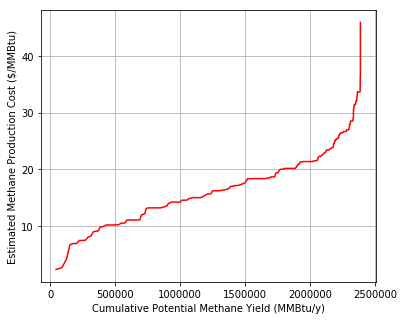

In [5]:
#Plot Cost vs Yield
yColName = 'Estimated Methane Production Cost ($/MMBtu)'
xColName = 'Cumulative Potential Methane Yield (MMBtu/y)'
x = dfDuplin[xColName]
y = dfDuplin[yColName]
plt.figure(figsize=(6,5))
plt.plot(x,y,'r-')
plt.xlabel(xColName)
plt.ylabel(yColName)
plt.grid()
plt.show()